In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Load the dataset
data = pd.read_csv('DataScience_salaries.csv')


In [7]:
# Statistical summary for salary-related columns
salary_stats = data[['salary_in_usd']].describe()
salary_stats.loc['mode'] = data[['salary_in_usd']].mode().iloc[0]
print("Statistical Analysis Table:")
print(salary_stats)

# Set a consistent Seaborn style
sns.set_theme(style="whitegrid")


Statistical Analysis Table:
       salary_in_usd
count   14838.000000
mean   149874.718763
std     69009.181349
min     15000.000000
25%    102000.000000
50%    141300.000000
75%    185900.000000
max    800000.000000
mode   150000.000000


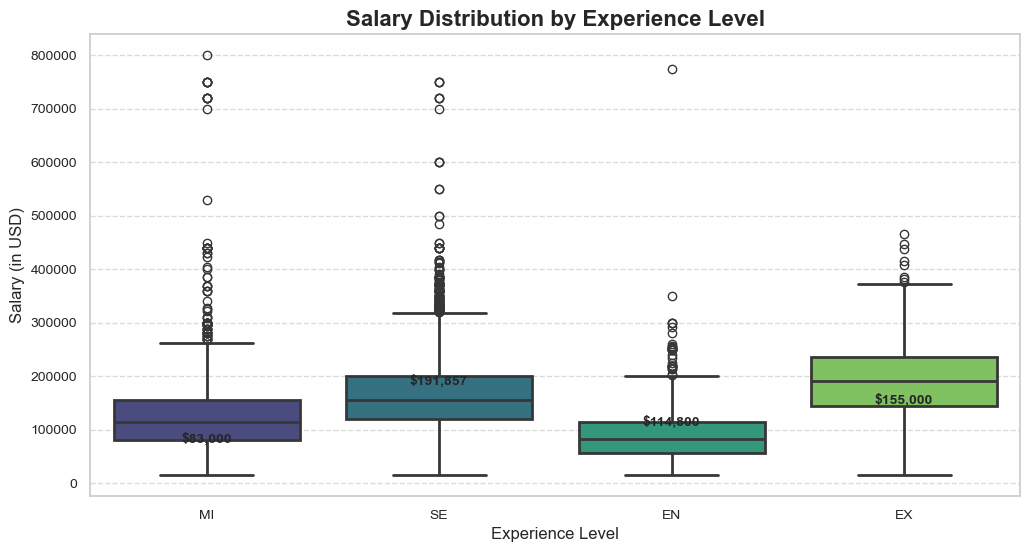

In [19]:
# Plot 1: Salary Distribution by Experience Level
plt.figure(figsize=(12, 6))
palette = sns.color_palette("viridis", 4)  # Use discrete colors
sns.boxplot(x='experience_level', y='salary_in_usd', data=data, hue='experience_level', palette=palette, linewidth=2, legend=False)
plt.title('Salary Distribution by Experience Level', fontsize=16, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (in USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, group in enumerate(data.groupby('experience_level')['salary_in_usd']):
    plt.text(i, group[1].median(), f"${group[1].median():,.0f}", ha='center', va='center', fontsize=10, fontweight='bold')
plt.savefig('salary_distribution_by_experience_level.png', dpi=300)  # Save the plot
plt.show()

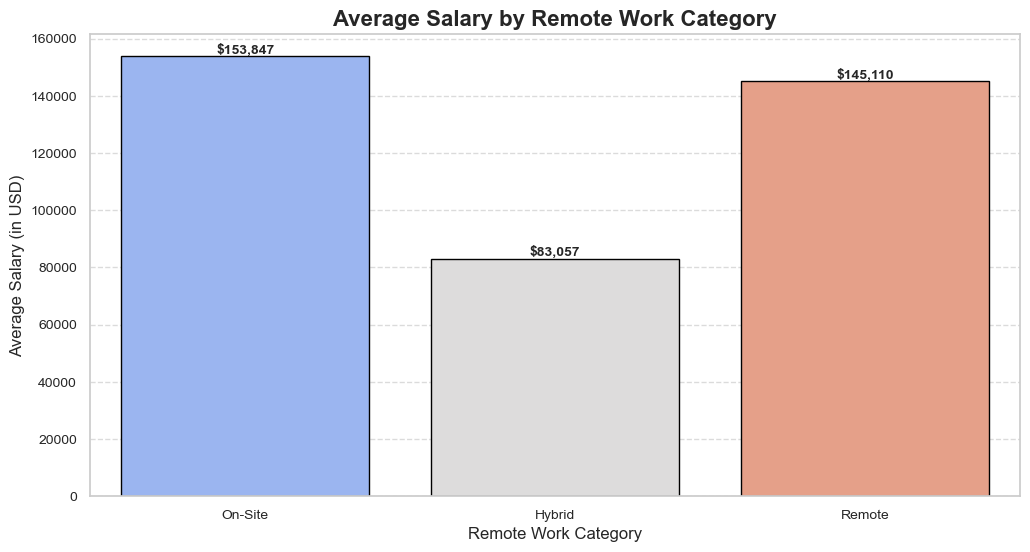

In [23]:
# Plot 2: Remote Ratio Impact on Salary
plt.figure(figsize=(12, 6))
data['remote_category'] = pd.cut(data['remote_ratio'], bins=[-1, 33, 66, 100], labels=['On-Site', 'Hybrid', 'Remote'])
mean_salary_by_remote = data.groupby('remote_category', observed=False)['salary_in_usd'].mean().reset_index()
sns.barplot(x='remote_category', y='salary_in_usd', data=mean_salary_by_remote, hue='remote_category', palette='coolwarm', edgecolor='black', legend=False)
plt.title('Average Salary by Remote Work Category', fontsize=16, fontweight='bold')
plt.xlabel('Remote Work Category', fontsize=12)
plt.ylabel('Average Salary (in USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, row in mean_salary_by_remote.iterrows():
    plt.text(i, row['salary_in_usd'], f"${row['salary_in_usd']:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.savefig('average_salary_by_remote_category.png', dpi=300)  # Save the plot
plt.show()

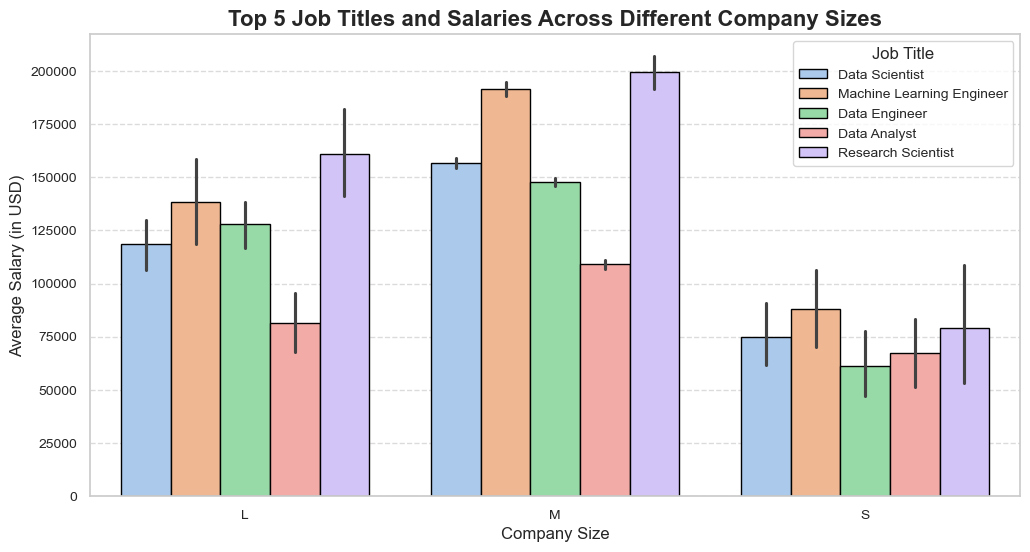

In [25]:
# Plot 3: Top 5 Job Titles and Salaries Across Different Company Sizes
plt.figure(figsize=(12, 6))
top_5_jobs = data['job_title'].value_counts()[:5].index  # Top 5 job titles
sns.barplot(
    x='company_size',
    y='salary_in_usd',
    hue='job_title',
    data=data[data['job_title'].isin(top_5_jobs)],
    palette="pastel",
    edgecolor='black',
)
plt.title('Top 5 Job Titles and Salaries Across Different Company Sizes', fontsize=16, fontweight='bold')
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Average Salary (in USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Job Title', fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('job_titles_salaries_by_company_size.png', dpi=300)  # Save the  plot
plt.show()

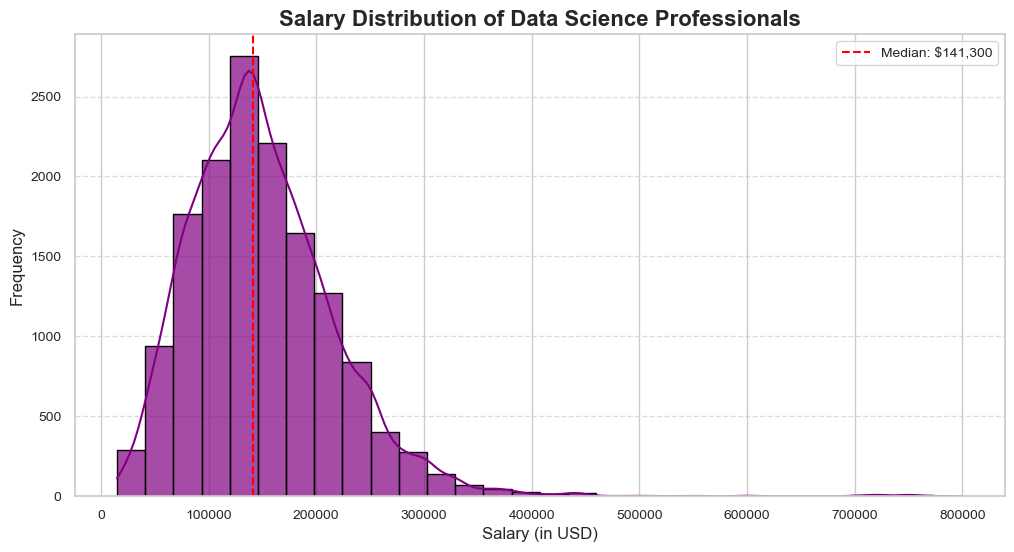

In [27]:
# Plot 4: Salary Distribution (Histogram with KDE)
plt.figure(figsize=(12, 6))
sns.histplot(data['salary_in_usd'], kde=True, color='purple', bins=30, edgecolor='black', alpha=0.7)
plt.title('Salary Distribution of Data Science Professionals', fontsize=16, fontweight='bold')
plt.xlabel('Salary (in USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(data['salary_in_usd'].median(), color='red', linestyle='--', label=f"Median: ${data['salary_in_usd'].median():,.0f}")
plt.legend(fontsize=10)
plt.savefig('salary_distribution_histogram.png', dpi=300)  # Save the plot
plt.show()

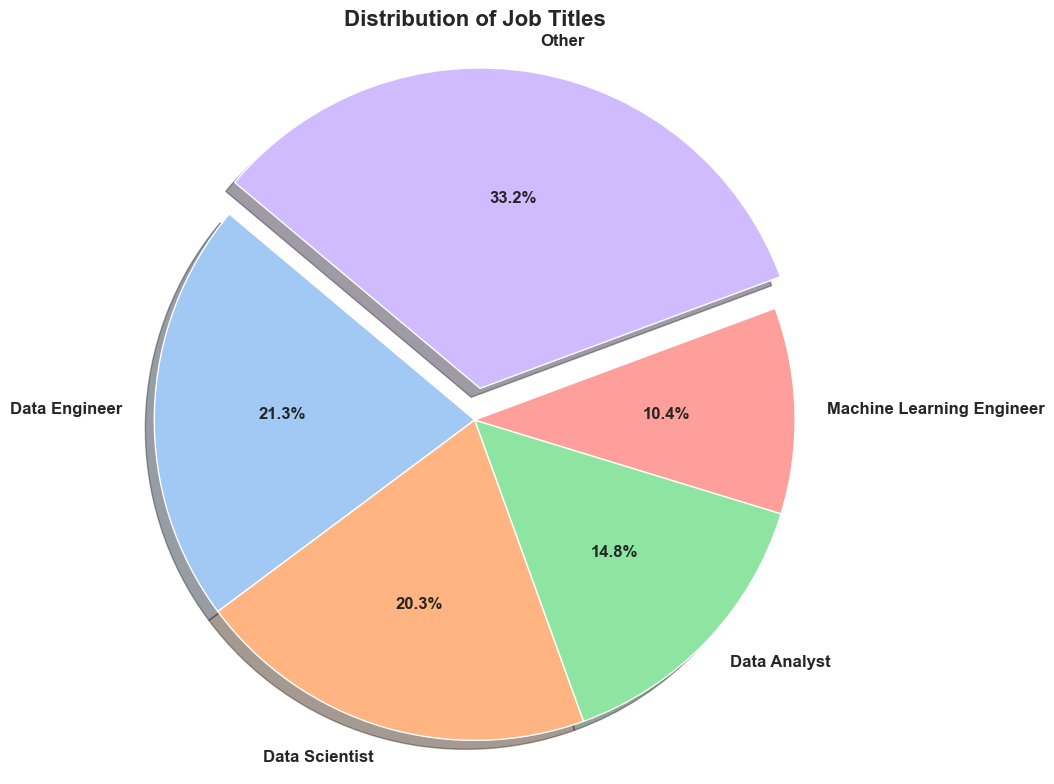

In [29]:
# plot 5: Job Title Distribution (Pie Chart)

# Calculate the percentage of each job title
job_title_counts = data['job_title'].value_counts(normalize=True) * 100

# Filter out job titles with less than 5% representation for better visualization
other_jobs_threshold = 5
top_job_titles = job_title_counts[job_title_counts >= other_jobs_threshold]
other_jobs = job_title_counts[job_title_counts < other_jobs_threshold].sum()
top_job_titles['Other'] = other_jobs

# Plotting pie chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel', len(top_job_titles))  # Use a pastel palette for better aesthetics
explode = [0.1 if label == 'Other' else 0 for label in top_job_titles.index]  # Highlight 'Other' category

plt.pie(
    top_job_titles,
    labels=top_job_titles.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'weight': 'bold'}  # Enhance text styling
)

plt.title('Distribution of Job Titles', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('job_titles_distribution_enhanced.png', dpi=300)  # Save the plot
plt.show()